<a href="https://colab.research.google.com/github/sumadvena/SiOC_2023/blob/main/SiOC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
from skimage import io
from scipy.ndimage import convolve

In [58]:
### KERNELS

sobel_vertical = np.array(
    [[-1, 0, 1],
     [-2, 0, 2],
     [-1, 0, 1]]
)

sobel_horizontal = np.array(
    [[1, 2, 1],
     [0, 0, 0],
     [-1, -2, -1]]
)

prewitt_vertical = np.array(
    [[-1, 0, 1],
     [-1, 0, 1],
     [-1, 0, 1]]
)

prewitt_horizontal = np.array(
    [[1, 1, 1],
     [0, 0, 0],
     [-1, -1, -1]]
)

laplace = np.array(
    [[0, 1, 0],
     [1, -4, 1],
     [0, 1, 0]]
)

basic_sharpening = np.array(
    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]]
)

unsharp_masking = np.array(
     [[1, 4, 6, 4, 1],
     [4, 16, 24, 16, 4],
     [6, 24, -476, 24, 6],
     [4, 16, 24, 16, 4],
     [1, 4, 6, 4, 1]]
) / -256

basic_gauss_blur = np.array(
    [[1, 2, 1],
     [2, 4, 2],
     [1, 2, 1]]
) / 16

extended_gauss_blur = np.array(
    [[1, 4, 6, 4, 1],
     [4, 16, 24, 16, 4],
     [6, 24, 36, 24, 6],
     [4, 16, 24, 16, 4],
     [1, 4, 6, 4, 1]]
) / 256



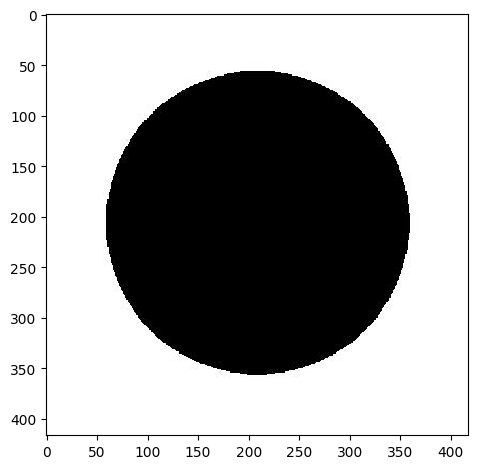

In [51]:
image = io.imread(r"/content/circle.png")

io.imshow(image)

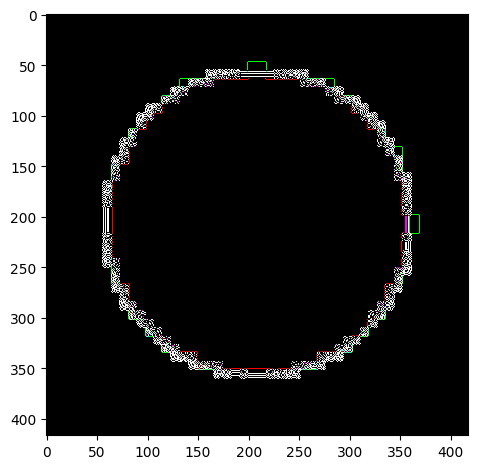

In [52]:
filtered_image = np.dstack([
    convolve(image[:, :, channel], laplace_filter, mode="constant", cval=0.0)
    for channel in range(3)
])

io.imshow(filtered_image)

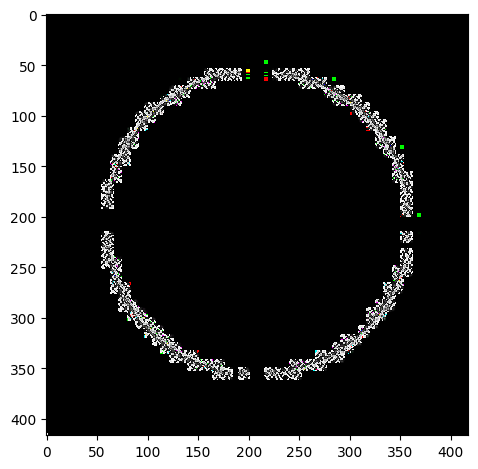

In [59]:
sec_filtered_image = np.dstack([
    convolve(image[:, :, channel], sobel_horizontal, mode="constant", cval=0.0)
    for channel in range(3)
])
ter_filtered_image = np.dstack([
    convolve(sec_filtered_image[:, :, channel], sobel_vertical, mode="constant", cval=0.0)
    for channel in range(3)
])

io.imshow(ter_filtered_image)

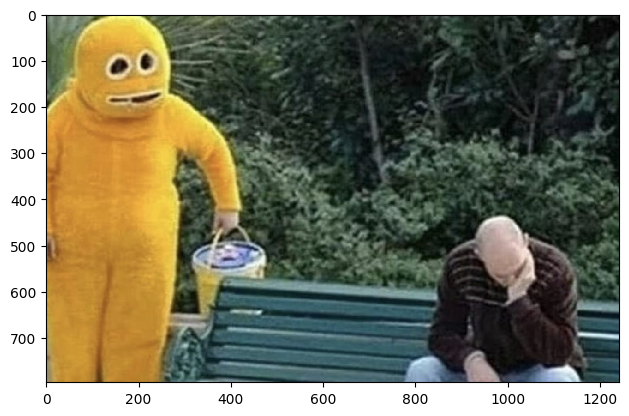

In [54]:
cimage = io.imread(r"/content/colorimg3.png")

io.imshow(cimage)

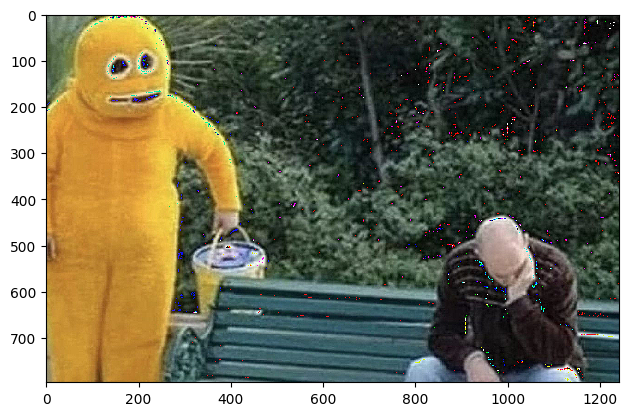

In [60]:
filtered_image = np.dstack([
    convolve(cimage[:, :, channel], basic_sharpening, mode="constant", cval=0.0)
    for channel in range(3)
])

io.imshow(filtered_image)